# Linear Regression, OLS and the Normal Equation
<br><br>
Note that OLS stands for Ordinary Least Squares and that it is analogous to the term "linear least squares." OLS tries to minimize the sum of squared distances between the regression estimate (the regression line) and each training data point. In linear regression we chose the following likelihood. Note that the notation below contains $\theta$ and $w$. Think of $\theta$ as 'all of the parameters in the model' and $w$ as the weights to apply to each feature $x_i$. So in this model the parameters are $w$ and the variance $\sigma^2$.
<br><br>
$$P(y|x,\theta) = N(y|w^Tx, \sigma^2)$$ 
<br>
$$\theta_{OLS} = \quad \underset{\theta}{\mathrm{argmax}}\quad log(P(Y|x,\theta)) \\
=\quad \underset{\theta}{\mathrm{argmin}}\quad -log(P(Y|x,\theta))\\
= \underset{\theta}{\mathrm{argmin}}\quad -log \prod_{i=1}^{N} P(y_i|x_i,\theta) \\
= \underset{\theta}{\mathrm{argmin}}\quad -\sum_{i=1}^{N} log(P(y_i|x_i,\theta))$$
<br><br>
Where $-log(P(Y|x,\theta)$ is also referred to as 'NLL' for negative log likelihood. So plugging in the Gaussian distribution as per the given likelihood and assuming that we have N data points, we have (note the introduction of $w$ in the notation):
<br><br>
$$\theta_{OLS} = \underset{\theta}{\mathrm{argmin}}\quad - \sum_{i=1}^{N} log  \frac{1}{\sqrt{2\pi\sigma^2}}exp(\frac{-(y_i - w^Tx_i)^2}{2\sigma^2})\\
= \underset{\theta}{\mathrm{argmin}}\quad - \sum_{i=1}^{N} log [\frac{1}{\sqrt{2\pi\sigma^2}}] + log [exp(\frac{-(y_i - w^Tx_i)^2}{2\sigma^2})]\\
= \underset{\theta}{\mathrm{argmin}}\quad - \sum_{i=1}^{N} [log(1)-log(2\pi\sigma^2)^{1/2} - \frac{-(y_i - w^Tx_i)^2}{2\sigma^2}]\\
= \underset{\theta}{\mathrm{argmin}}\quad \sum_{i=1}^{N} [0+\frac{log(2\pi\sigma^2)}{2} + \frac{-(y_i - w^Tx_i)^2}{2\sigma^2}]\\
= \underset{\theta}{\mathrm{argmin}}\quad \sum_{i=1}^{N} \frac{log(2\pi\sigma^2)}{2} + \sum_{i=1}^{D} \frac{-(y_i - w^Tx_i)^2}{2\sigma^2}\\
= \underset{\theta}{\mathrm{argmin}}\quad \frac{N}{2}log(2\pi\sigma^2) + \frac{1}{2\sigma^2} \sum_{i=1}^{D} -(y_i - w^Tx_i)^2\\
= \underset{\theta}{\mathrm{argmin}}\quad someconstant + \frac{1}{2\sigma^2} ||y-w^Tx||_{2}^{2}\\
= \underset{\theta}{\mathrm{argmin}}\quad someconstant + \frac{1}{2\sigma^2} RSS(w)
$$
<br><br>
Where **RSS** stands for residual sum of squares. Note that RSS is also called the sum of squared errors(**SSE**), and that SSE/N is called the mean squared error or **MSE**.
<br>

# Normal Equation
<br>
Since the OLS likelihood produces a convex, continuous function with a unique minimum we can actually find a closed form solution. That is when the Normal Equation comes in. If we use matrix algebra we arrive at $\theta_{OLS}$ as per below.
<br><br>
$$
\theta_{OLS} = \underset{w}{\mathrm{argmin}} \quad NLL(w)\\
= \frac{1}{2}(y-X)T(y-Xw)\\
= \frac{1}{2}w^T(X^TX)w - w^T(X^Ty)
$$
<br><br>
Taking the gradient of $w$ which is the same as taking the partial derivative w.r.t. $w$ we get:
<br><br>
$$
g(w) = (X^TXw - X^Ty)\\
=\sum_{i=1}^{N}x_i(w^Tx_i-y_i)
$$
<br><br>
Finally, we set the gradient of $w$ equal to zero and get:
<br><br>
$$
X^TXw = X^Ty\\
w = w_{OLS} = (X^TX)^{-1}XTy
$$
<br><br>
And to reiterate, $w_{OLS} = w_{MLE}$ when the likelihood is normally distributed. Leaving aside the details, below is sample code for computing $w$ using the normal equation. Assume that 'x_train' has your training samples and 'y_train' has the corresponding labels. 
<br>
> xTx = x_train.T.dot(x_train)<br>
> XtX = np.linalg.inv(xTx)<br>
> w_ols = XtX.dot(x_train.T).dot(y_train)

# Linear Regression with scikit-learn

/Users/gonzalobriceno/venvp3/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


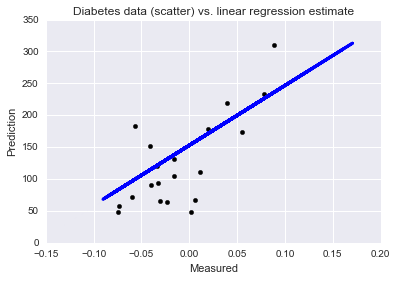

In [2]:
from sklearn import datasets
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(color_codes=True)
%matplotlib inline

lr = linear_model.LinearRegression()
# Load the diabetes dataset
diabetes = datasets.load_diabetes()
# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Train the model using the training sets
lr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the training set. You would use the testing set but this is for illustrative purposes only.
diabetes_pred = lr.predict(diabetes_X_train)

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_train, diabetes_pred, color='blue', linewidth=3)
plt.xlabel("Measured")
plt.ylabel("Prediction")
plt.title("Diabetes data (scatter) vs. linear regression estimate")
plt.show()

Final note. I've heard the question, 'what is the difference between LinearRegression and Stochastic Gradient Descent(SGD)/Gradient Descent(GD)'? Since linear regression has a closed form solution that is the best, least computationally intensive to go about finding a solution. Gradient Descent is an iterative method to minimize a cost function so it can be used to find the MLE by minimizing the SSE. So Gradient Descent could very well be used to solve a linear regression problem, among others. The posts below cover these topics as well: 
* [Quora - linear regression vs. gradient descent](https://www.quora.com/How-are-linear-regression-and-gradient-descent-related-is-gradient-descent-a-type-of-linear-regression-and-is-it-similar-to-ordinary-least-squares-OLS-and-generalized-least-squares-GLS)
* https://sdsawtelle.github.io/blog/output/week2-andrew-ng-machine-learning-with-python.html

<br><br>
# Key Take Away
<br>
Produce a regression point estimate. Note that you could use linear regression of gradient descent with the linear regression input parameter.

In [3]:
diabetes_X_train.shape

(422, 1)

In [4]:
diabetes_y_train.shape

(422,)